In [1]:
#Useful tip: to get help on any function, just type
#[command name]?
#e.g. int?

In [2]:
import pandas as pd
from rpy2.robjects.packages import importr
r_utils = importr('utils')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
USArrests = pd.read_csv("USArrests.csv")
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
#If there are errors about missing R packages, run the relevant code below:
#r_utils.install_packages('aplpack')
#r_utils.install_packages('TeachingDemos')
#r_utils.install_packages('ggplot2')
#r_utils.install_packages('cluster')
#r_utils.install_packages('factoextra')
#r_utils.install_packages('dbscan')

In [4]:
from sklearn import preprocessing
df = USArrests[['Murder','Assault','UrbanPop','Rape']]
scaled_df = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
pca = PCA()
X = pca.fit_transform(scaled_df)
pc_rotation = np.transpose(pca.components_[0:4, :])
print(pc_rotation)
Y = USArrests[['State']]
pd.DataFrame(pca.components_,columns=scaled_df.columns,index = ['PC-1','PC-2','PC-3','PC-4']).transpose()
state_abbrv = pd.DataFrame({'StateAbbrv':["AL", "AK", "AZ", "AR", "CA", "CO", "CT","DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ","NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC","SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]})
USArrests[['StateAbbrv']] = state_abbrv
USArrests_pca = X

[[ 0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [ 0.58318363  0.1879856  -0.26814843 -0.74340748]
 [ 0.27819087 -0.87280619 -0.37801579  0.13387773]
 [ 0.54343209 -0.16731864  0.81777791  0.08902432]]


/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


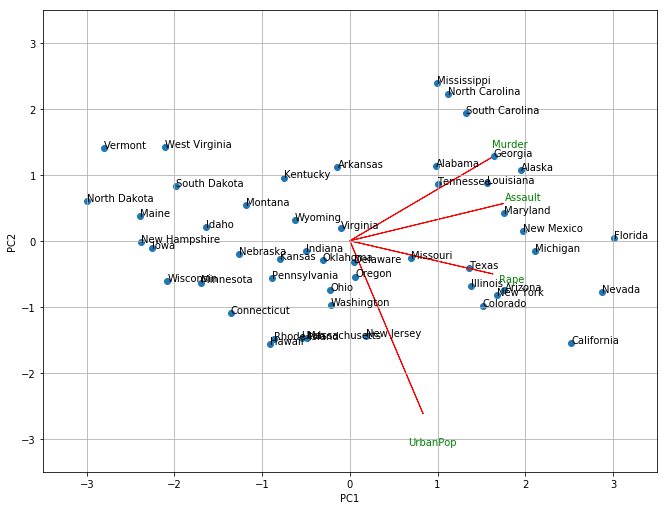

In [5]:
#reference: 
# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score,coeff,labels,pointlabels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    plt.scatter(xs,ys)
    for i in range(len(xs)):
        plt.text(xs[i],ys[i],list(pointlabels.iloc[i])[0])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*3, coeff[i,1]*3,color = 'r',alpha = 1)
        plt.text(coeff[i,0]* 3.4, coeff[i,1] * 3.5, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(11,8.5))
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
biplot(X[:,0:4],pc_rotation[0:4, :],scaled_df.columns,USArrests[['State']])

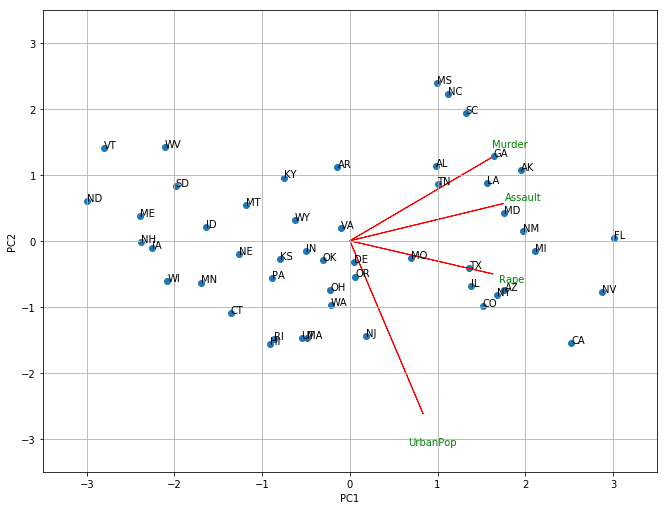

In [6]:
plt.figure(figsize=(11,8.5))
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
biplot(X[:,0:4],pc_rotation[0:4, :],scaled_df.columns,USArrests[['StateAbbrv']])

In [7]:
pc_rotation

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [8]:
print("Standard Deviation:")
pr_sd = np.sqrt(pca.explained_variance_)
print(pr_sd)
print("Variance:")
pr_var = pca.explained_variance_
print(pr_var)

Standard Deviation:
[1.5908673  1.00496987 0.6031915  0.4206774 ]
Variance:
[2.53085875 1.00996444 0.36383998 0.17696948]


In [9]:
pve=pr_var/sum(pr_var)
print("Proportion of variance explained by each PC:")
print(pve)

Proportion of variance explained by each PC:
[0.62006039 0.24744129 0.0891408  0.04335752]


In [10]:
np.cumsum(pve)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

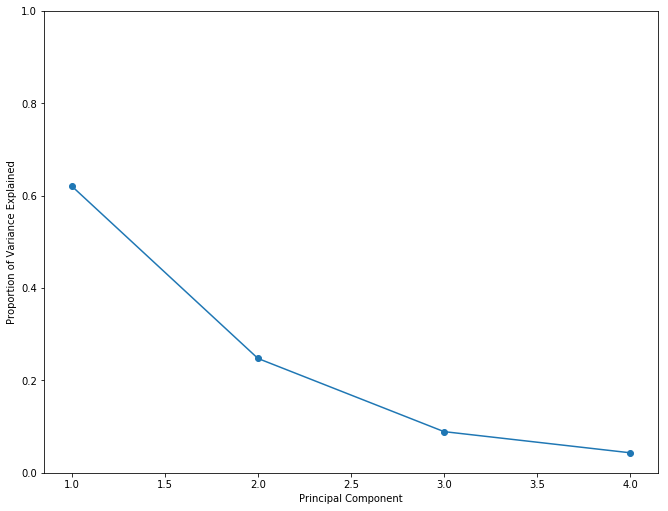

In [11]:
ax0 = plt.figure(figsize=(11,8.5))
_ = plt.plot(range(1,5),pve,"-o")
_ = plt.xlabel("Principal Component")
_ = plt.ylabel("Proportion of Variance Explained")
_ = plt.ylim(0,1)

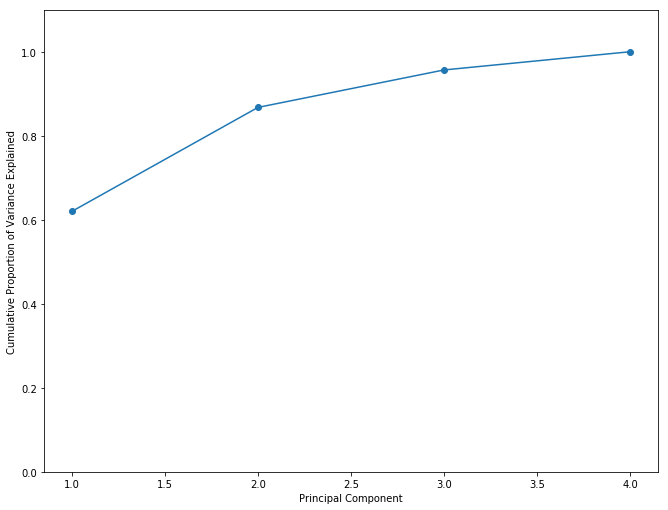

In [12]:
ax1 = plt.figure(figsize=(11,8.5))
_ = plt.plot(range(1,5),np.cumsum(pve),"-o")
_ = plt.xlabel("Principal Component")
_ = plt.ylabel("Cumulative Proportion of Variance Explained")
_ = plt.ylim(0,1.1)

In [13]:
r_ggplot2 = importr('ggplot2')
import IPython
import rpy2
from rpy2.robjects.lib.grdevices import render_to_bytesio
from rpy2.robjects import pandas2ri
pandas2ri.activate()

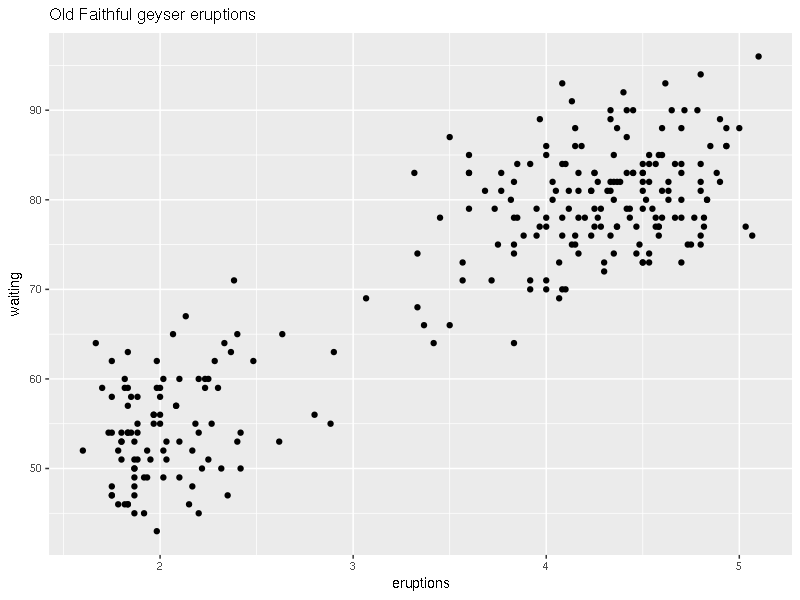

In [14]:
faithful = pd.read_csv("faithful.csv")
r_faithful = pandas2ri.py2ri(faithful)
import rpy2.robjects.lib.ggplot2 as ggplot2
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (ggplot2.ggplot(r_faithful)+ggplot2.aes_string(x= "eruptions", y = "waiting") + ggplot2.geom_point() + ggplot2.ggtitle("Old Faithful geyser eruptions")).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

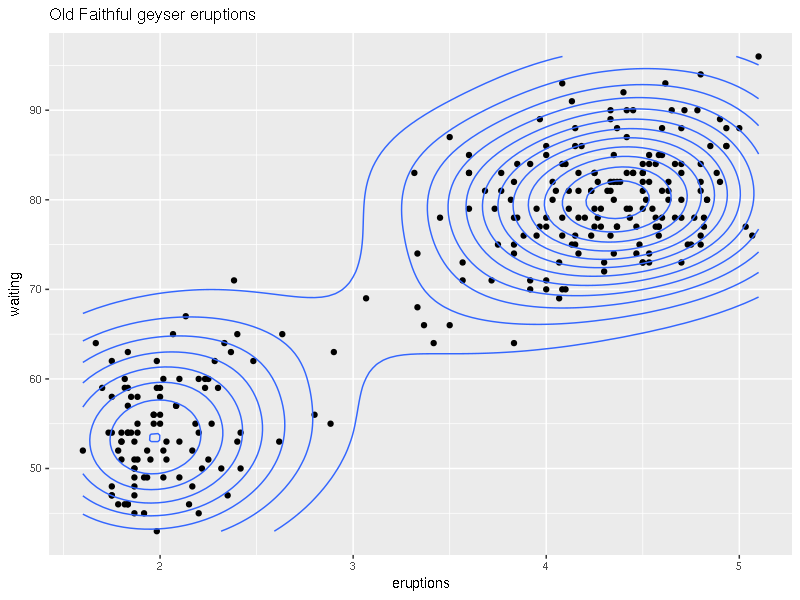

In [15]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (ggplot2.ggplot(r_faithful)+ggplot2.aes_string(x= "eruptions", y = "waiting") + ggplot2.geom_point() + ggplot2.geom_density2d() + ggplot2.ggtitle("Old Faithful geyser eruptions")).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

In [16]:
#note that sample in R samples without replacement by default, 
#while np.random.choice samples with replacement by default.
np.random.seed(123) #make sampling deterministic
ss = np.random.choice(np.arange(0,50),10,replace=False) #take 10 random rows
arrests = USArrests.iloc[ss]
arrests = arrests.reset_index()
arrests = arrests.drop(['index'],axis=1)
arrests.head(6)

,State,Murder,Assault,UrbanPop,Rape,StateAbbrv
0,Hawaii,5.3,46,83,20.2,HI
1,Indiana,7.2,113,65,21.0,IN
2,New Mexico,11.4,285,70,32.1,NM
3,Washington,4.0,145,73,26.2,WA
4,Maine,2.1,83,51,7.8,ME
5,Alabama,13.2,236,58,21.2,AL


In [17]:
arrests_scaled = pd.DataFrame(preprocessing.scale(arrests[['Murder','Assault','UrbanPop','Rape']]))
arrests_scaled['State'] = arrests['State']
np.round(arrests_scaled.head(6),2)

/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,0,1,2,3,State
0,-0.65,-1.39,0.95,-0.19,Hawaii
1,-0.20,-0.66,-0.34,-0.08,Indiana
2,0.81,1.21,0.02,1.45,New Mexico
3,-0.96,-0.31,0.24,0.64,Washington
4,-1.41,-0.98,-1.33,-1.91,Maine
5,1.24,0.68,-0.84,-0.06,Alabama


In [18]:
pca2 = PCA()
X2 = pca2.fit_transform(arrests_scaled[[0,1,2,3]])
pc_rotation2 = np.transpose(pca2.components_[0:4, :])

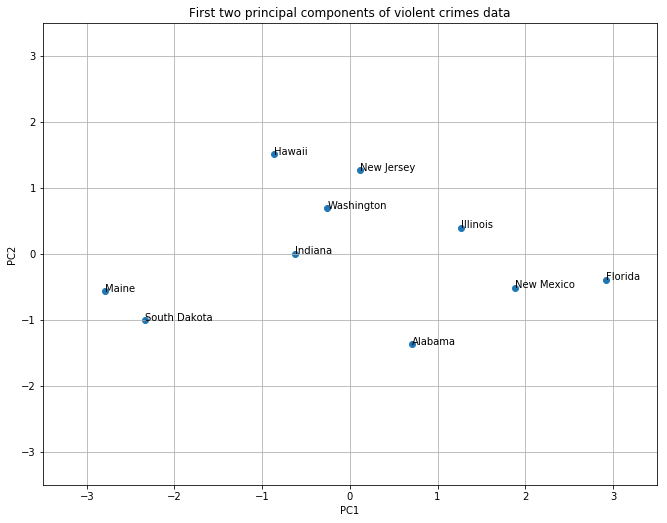

In [19]:
plt.figure(figsize=(11,8.5))
def firsttwopc(score,coeff,pointlabels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    plt.scatter(xs,ys)
    for i in range(len(xs)):
        plt.text(xs[i],ys[i],list(pointlabels.iloc[i])[0])
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("First two principal components of violent crimes data")
plt.grid()
firsttwopc(X2[:,0:4],pc_rotation2[0:4, :],arrests_scaled[['State']])

In [20]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [21]:
dist_eucl = pdist(arrests_scaled[[0,1,2,3]],metric="euclidean")

In [22]:
print(arrests_scaled[['State']][0:5])
np.round(squareform(dist_eucl)[0:5,0:5],1)

        State
0      Hawaii
1     Indiana
2  New Mexico
3  Washington
4       Maine


array([[0. , 1.5, 3.5, 1.6, 3. ],
       [1.5, 0. , 2.6, 1.2, 2.4],
       [3.5, 2.6, 0. , 2.5, 4.8],
       [1.6, 1.2, 2.5, 0. , 3.1],
       [3. , 2.4, 4.8, 3.1, 0. ]])

In [23]:
import seaborn as sns

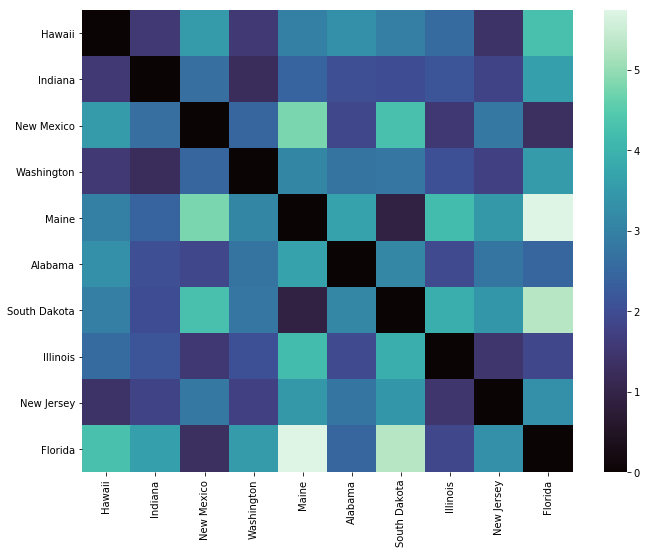

In [24]:
flatten = lambda l: [item for sublist in l for item in sublist]
statenames = flatten(arrests_scaled[['State']].values)
plt.figure(figsize=(11,8.5))
_ = sns.heatmap(squareform(dist_eucl),cmap="mako",xticklabels=statenames,yticklabels=statenames)

In [25]:
USArrests_scaled = pd.DataFrame(preprocessing.scale(USArrests[['Murder','Assault','UrbanPop','Rape']]))
USArrests_scaled['State'] = USArrests['State']
USArrests_scaled['StateAbbrv'] = USArrests['StateAbbrv']
res_dist = pdist(USArrests_scaled[[0,1,2,3]],metric="euclidean")

/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


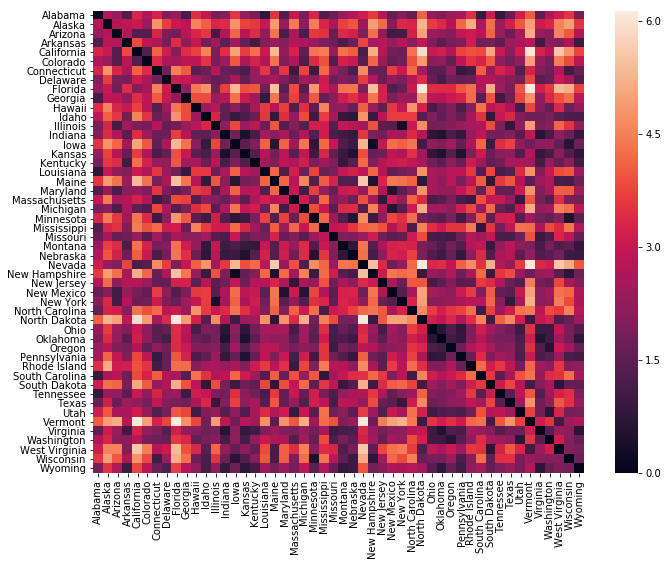

In [26]:
fullstatenames = flatten(USArrests_scaled[['State']].values)
plt.figure(figsize=(11,8.5))
_ = sns.heatmap(squareform(res_dist),xticklabels=fullstatenames,yticklabels=fullstatenames)

In [27]:
from sklearn.cluster import KMeans
#random_state parameter sets seed for random number generation
arrests_km = KMeans(n_clusters=4,n_init=25,random_state=123).fit(USArrests_scaled[[0,1,2,3]])

In [28]:
pd.DataFrame(arrests_km.cluster_centers_,columns=['Murder','Assault','UrbanPop','Rape'],index = range(1,5))

,Murder,Assault,UrbanPop,Rape
1,-0.494407,-0.386484,0.581676,-0.264310
2,0.702127,1.049994,0.729974,1.289904
3,-0.971303,-1.117836,-0.939550,-0.976578
4,1.426224,0.883211,-0.822791,0.019467


In [29]:
pd.DataFrame(arrests_km.labels_+1,columns=['Cluster'],index=fullstatenames)

,Cluster
Alabama,4
Alaska,2
Arizona,2
Arkansas,4
California,2
Colorado,2
Connecticut,1
Delaware,1
Florida,2
Georgia,4


In [30]:
USArrests['Cluster'] = arrests_km.labels_+1

In [31]:
USArrests.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
1,5.656250,138.875000,73.875000,18.781250
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923
4,13.937500,243.625000,53.750000,21.412500


In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#returns silhouette
def silplot(X,mypca,mypca_centers,n_clusters,clusterer,cluster_labels,pointlabels=None,):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(1,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = 1 - cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(mypca[:,0],mypca[:,1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = mypca[:, 0]
    ys = mypca[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = mypca_centers
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i+1), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("1st Principal Component")
    ax2.set_ylabel("2nd Principal Component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    return sample_silhouette_values

For n_clusters = 4, the average silhouette_score is 0.33968891433344395.


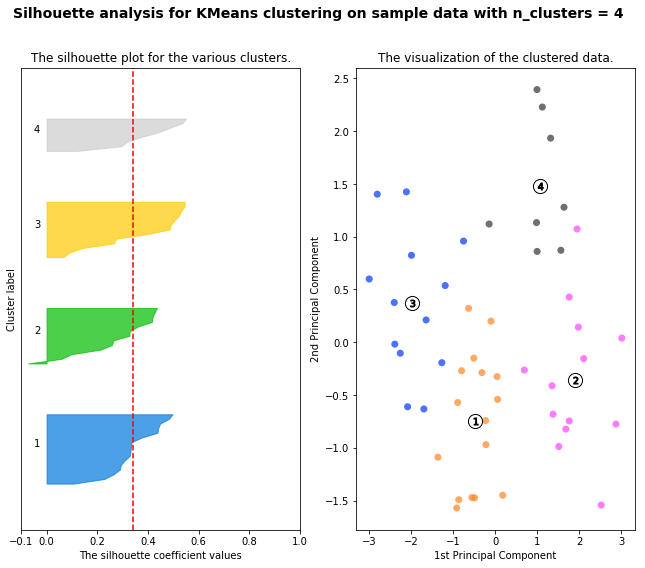

In [33]:
pca_arrests_km_centers = KMeans(n_clusters=4,n_init=25,random_state=123).fit(USArrests_pca).cluster_centers_
_ = silplot(np.array(USArrests_scaled[[0,1,2,3]]),USArrests_pca,pca_arrests_km_centers,4,arrests_km,arrests_km.labels_+1)

For n_clusters = 4, the average silhouette_score is 0.33968891433344395.


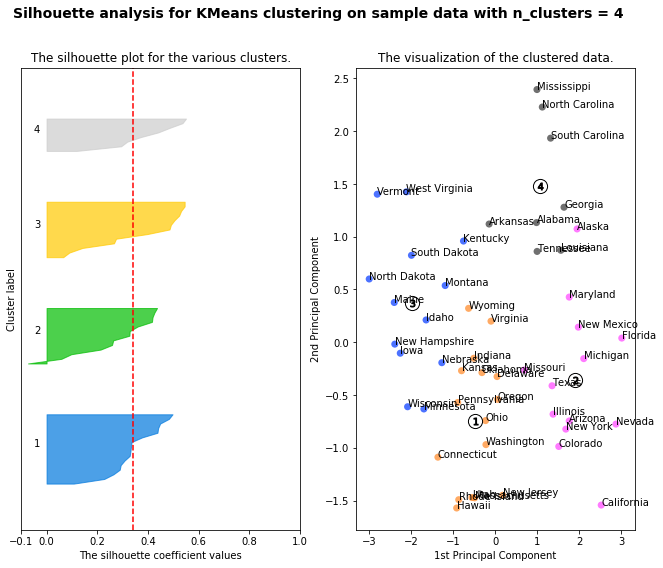

In [34]:
sil = silplot(np.array(USArrests_scaled[[0,1,2,3]]),USArrests_pca,pca_arrests_km_centers,4,arrests_km,arrests_km.labels_+1,fullstatenames)

For n_clusters = 4, the average silhouette_score is 0.33968891433344395.


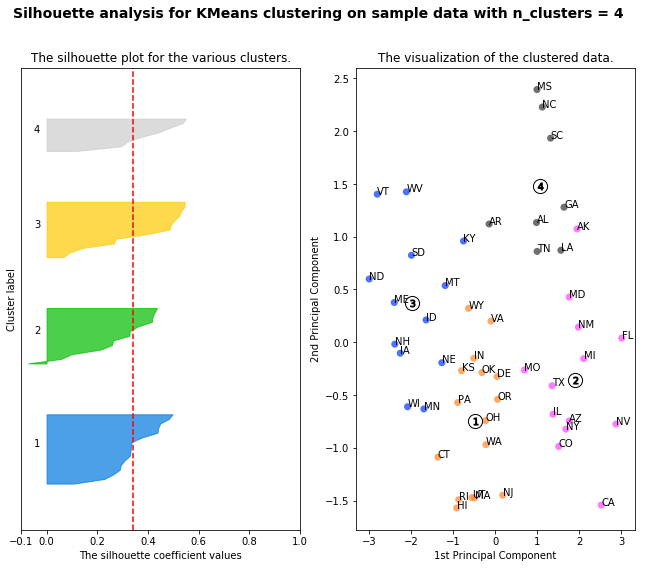

In [35]:
sil = silplot(np.array(USArrests_scaled[[0,1,2,3]]),USArrests_pca,pca_arrests_km_centers,4,arrests_km,arrests_km.labels_+1,flatten(np.array(state_abbrv)))

In [36]:
# Objects with negative silhouette
[fullstatenames[i] for i in range(len(sil)) if sil[i] < 0]

['Missouri']

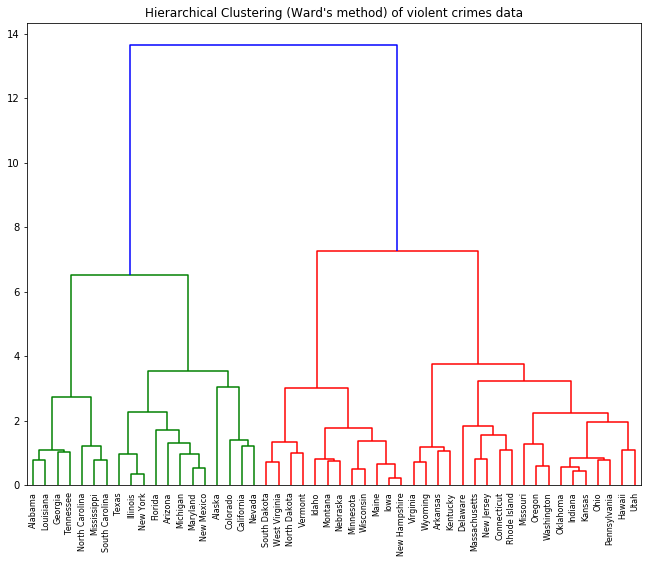

In [37]:
import scipy.cluster.hierarchy as hac
plt.figure(figsize=(11,8.5))
dn = hac.dendrogram(hac.ward(pdist(USArrests_scaled[[0,1,2,3]],metric="euclidean")),labels=fullstatenames)
_ = plt.title("Hierarchical Clustering (Ward's method) of violent crimes data")

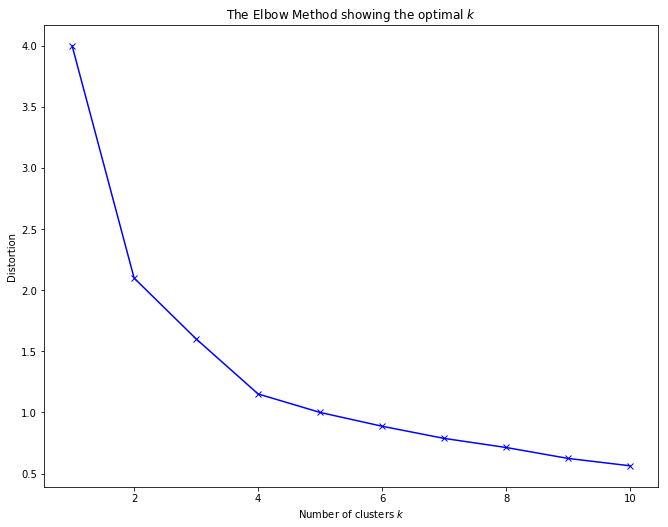

In [38]:
from scipy.spatial.distance import cdist
wss = []
for i in range(1,11):
    fitx =KMeans(n_clusters=i,n_init=25,random_state=123).fit(USArrests_scaled[[0,1,2,3]])
    wss.append(sum(np.min(cdist(USArrests_scaled[[0,1,2,3]],fitx.cluster_centers_,'sqeuclidean'),axis=1))/USArrests_scaled[[0,1,2,3]].shape[0])
plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Distortion')
_ = plt.title('The Elbow Method showing the optimal $k$')

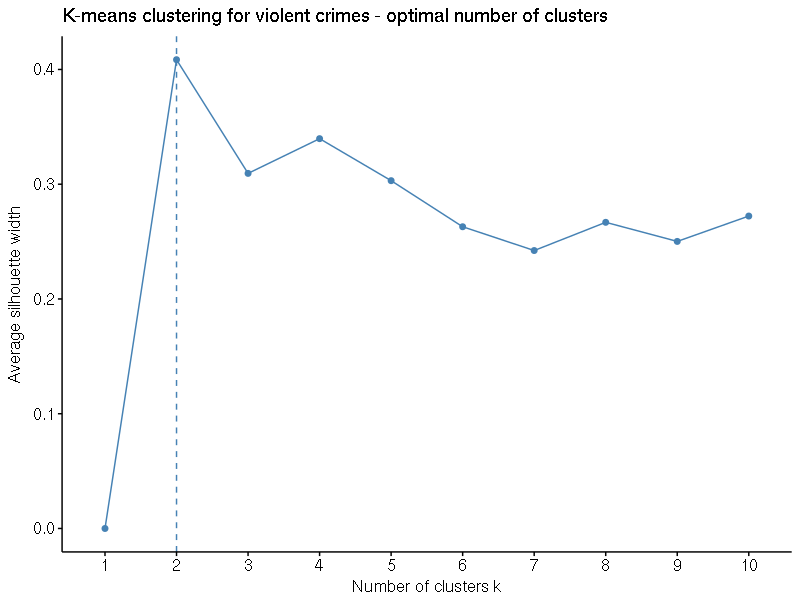

In [39]:
#silhouette method for selecting clusters from kmeans
r_stats = importr('stats')
r_factoextra = importr('factoextra')
r_base = importr('base')
r_USArrests = pandas2ri.py2ri(USArrests.set_index("State")[['Murder','Assault','UrbanPop','Rape']])
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (r_factoextra.fviz_nbclust(r_base.scale(r_USArrests),r_stats.kmeans,method="silhouette") +ggplot2.ggtitle("K-means clustering for violent crimes - optimal number of clusters")).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

In [40]:
%%capture 
#don't show output of clusGap function
r_cluster = importr('cluster')
arrests_gapstat = r_cluster.clusGap(r_base.scale(r_USArrests),FUN=r_stats.kmeans,nstart=25,d_power=2,K_max=10,B=500)

In [41]:
print(arrests_gapstat.rx("Tab"))

$Tab
          logW   E.logW       gap     SE.sim
 [1,] 4.584967 4.907233 0.3222657 0.07799935
 [2,] 3.940245 4.365433 0.4251882 0.06962999
 [3,] 3.667698 4.115636 0.4479382 0.07011721
 [4,] 3.339378 3.906026 0.5666477 0.07072456
 [5,] 3.197534 3.730812 0.5332778 0.07399028
 [6,] 3.065248 3.578118 0.5128703 0.07355817
 [7,] 2.953679 3.441242 0.4875630 0.07399843
 [8,] 2.846166 3.318051 0.4718845 0.07565205
 [9,] 2.706252 3.205752 0.4994999 0.07729045
[10,] 2.571982 3.100582 0.5286005 0.07941540




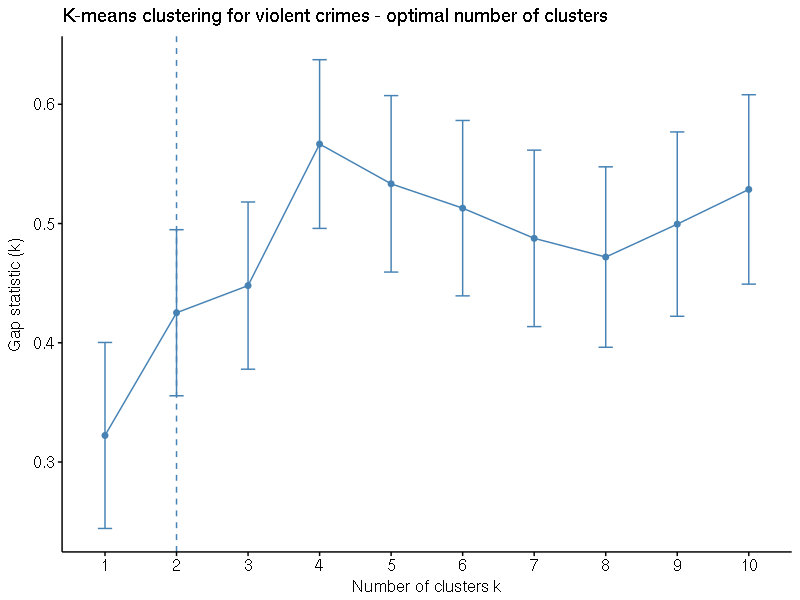

In [42]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (r_factoextra.fviz_gap_stat(arrests_gapstat,maxSE=r_base.list(method="Tibs2001SEmax",SE_factor=1))+ggplot2.ggtitle("K-means clustering for violent crimes - optimal number of clusters") ).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

In [43]:
r_dbscan = importr("dbscan")
multishapes = pd.read_csv("multishapes.csv")
ms = multishapes[['x','y']]

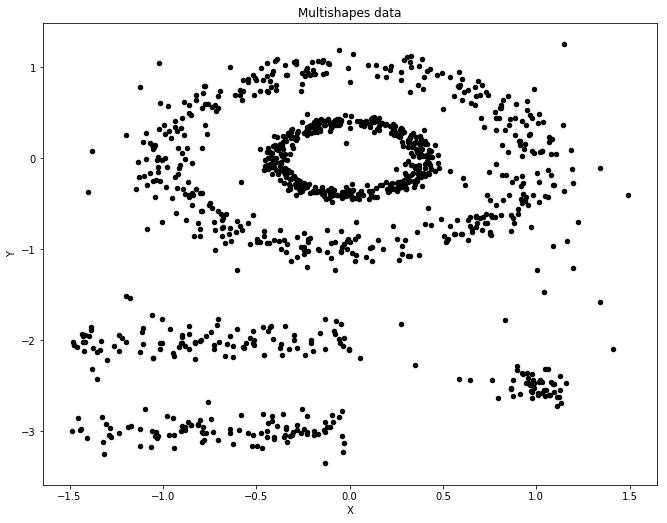

In [44]:
msplot = ms.plot.scatter(x='x',y='y',c='Black',title="Multishapes data",figsize=(11,8.5))
_ = msplot.set_xlabel("X")
_ = msplot.set_ylabel("Y")

In [45]:
_ = r_base.set_seed(123) #set seed for random number generation
ms_kmeans = r_stats.kmeans(ms, 5, nstart=5)

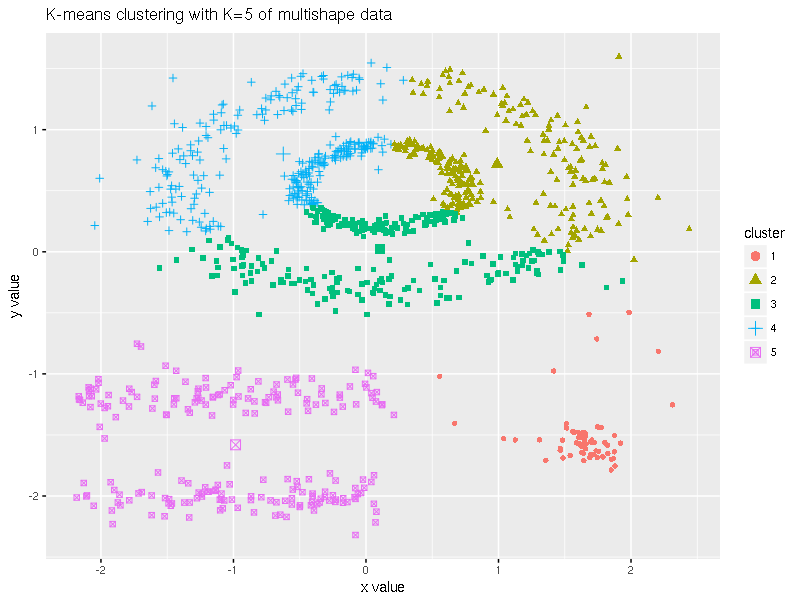

In [46]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (r_factoextra.fviz_cluster(ms_kmeans, ms, ellipse = False, geom = "point") + ggplot2.ggtitle("K-means clustering with K=5 of multishape data")).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

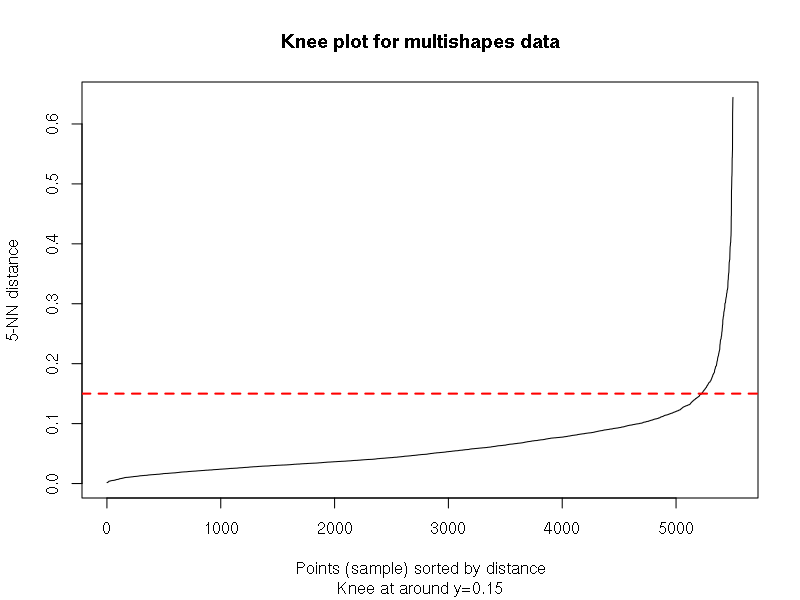

In [47]:
r_graphics = importr("graphics")
_ = r_base.set_seed(123) #set seed for random number generation
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    r_dbscan.kNNdistplot(ms,k=5)
    r_graphics.abline(0.15,0,lty=2,lwd=2,col="red") # added after seeing kNN plot
    r_graphics.title(sub="Knee at around y=0.15",main="Knee plot for multishapes data")
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

In [48]:
ms_db = r_dbscan.dbscan(ms, eps=0.15, minPts = 5)

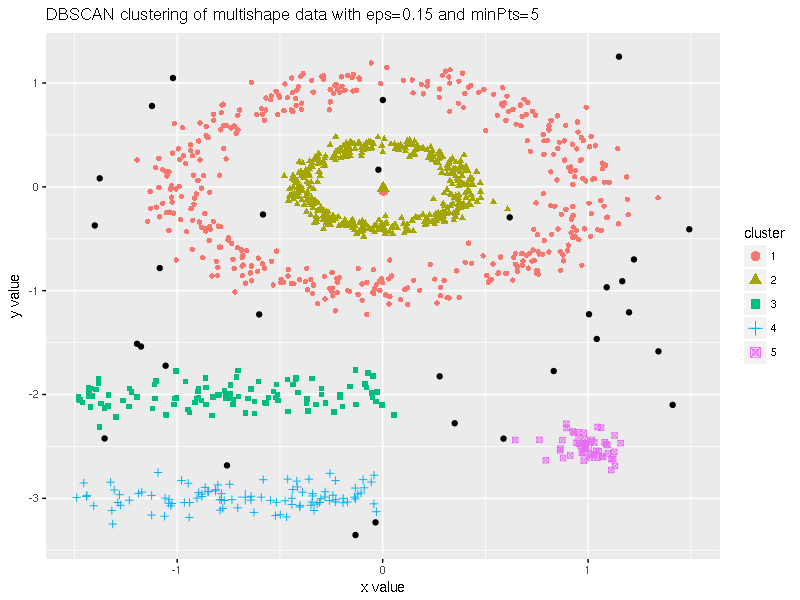

In [49]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (r_factoextra.fviz_cluster(ms_db, ms, stand = False, ellipse = False, geom = "point") + ggplot2.ggtitle("DBSCAN clustering of multishape data with eps=0.15 and minPts=5")).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

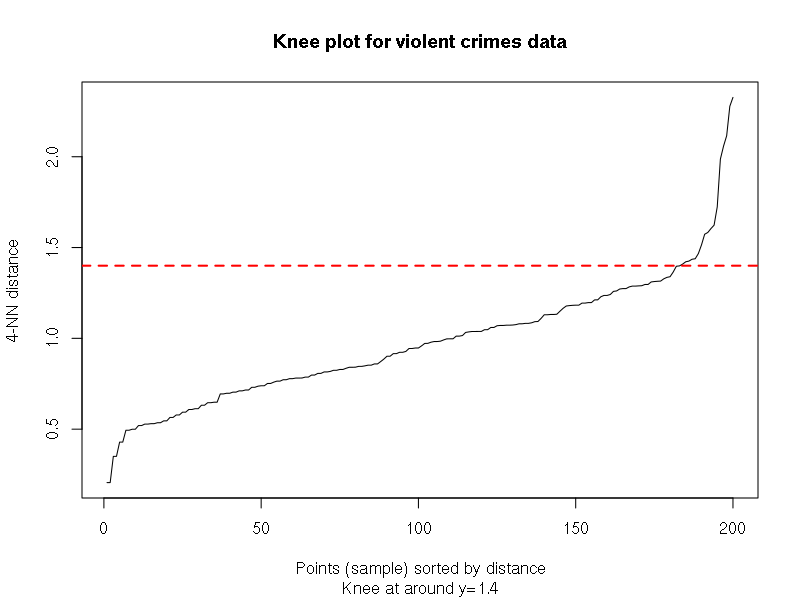

In [50]:
_ = r_base.set_seed(123) #set seed for random number generation
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    r_dbscan.kNNdistplot(r_base.scale(r_USArrests),k=4)
    r_graphics.abline(1.4,0,lty=2,lwd=2,col="red") # added after seeing kNN plot
    r_graphics.title(sub="Knee at around y=1.4",main="Knee plot for violent crimes data")
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

In [51]:
arrests_db = r_dbscan.dbscan(r_base.scale(r_USArrests), eps=1.4, minPts=4)

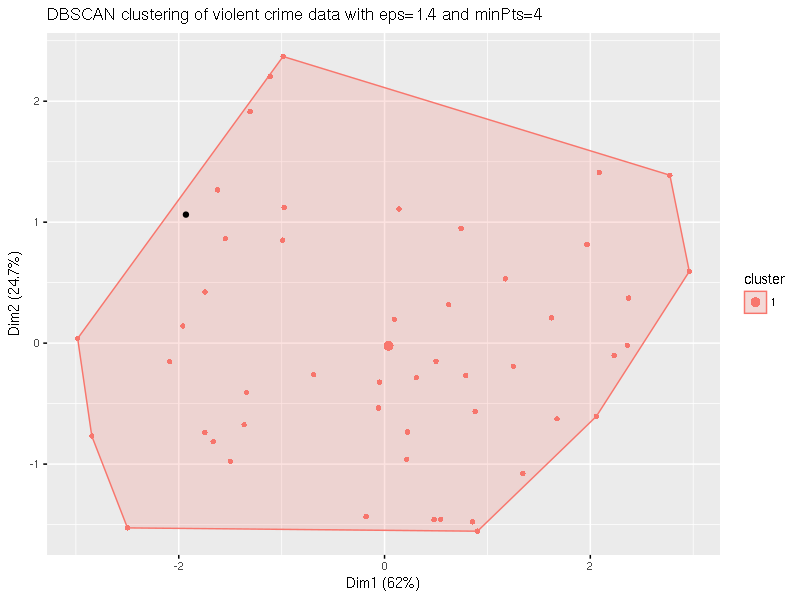

In [52]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=800, height=600, res=100) as img:
    (r_factoextra.fviz_cluster(arrests_db,r_base.scale(r_USArrests),stand = False,ellipse_type = "convex", geom = "point")+ggplot2.ggtitle("DBSCAN clustering of violent crime data with eps=1.4 and minPts=4")).plot()
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

In [53]:
Cars93 = pd.read_csv("cars93.csv")
Cars93 = Cars93.set_index("Make") #change the row names to the car make
r_aplpack = importr('aplpack')
r_teachingdemos = importr('TeachingDemos')

In [54]:
car_cols = ["Weight","MPG.city","MPG.highway","Horsepower","EngineSize","Min.Price","Price","Max.Price","RPM","Rev.per.mile","Fuel.tank.capacity","Passengers","Length","Wheelbase","Width","Turn.circle"]
r_cars93 = pandas2ri.py2ri(Cars93[car_cols].iloc[0:40])

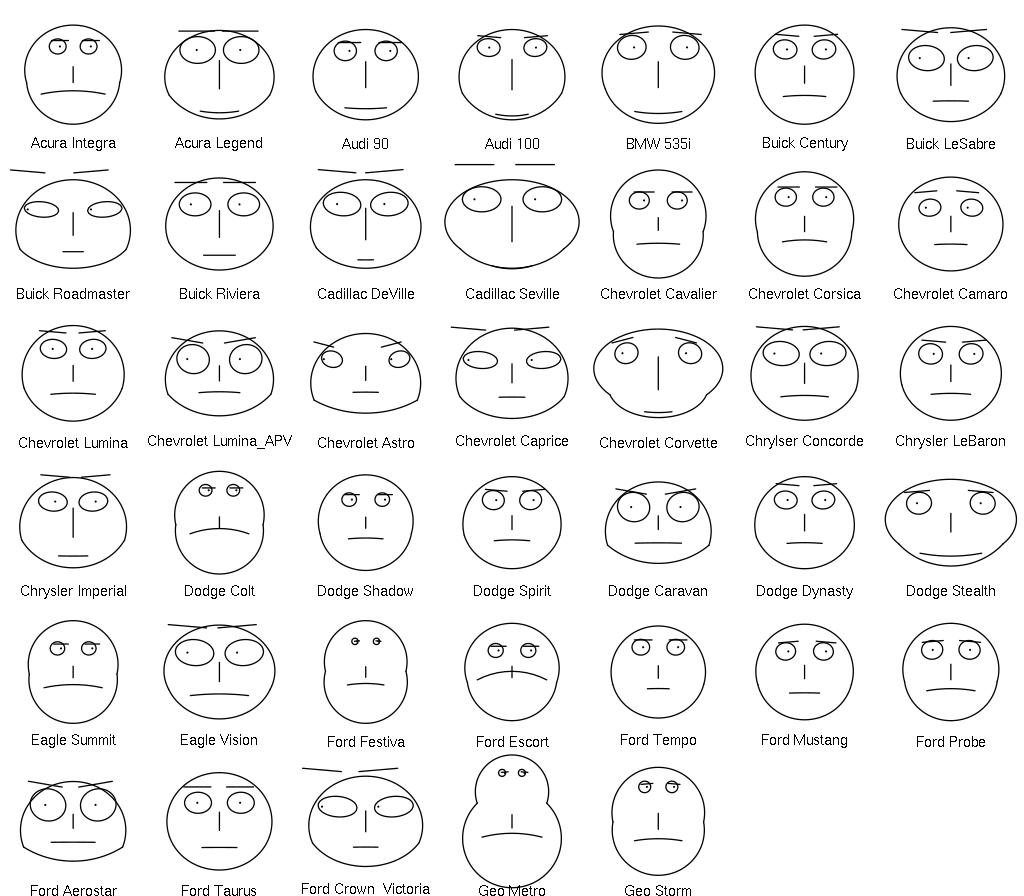

In [55]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=1024, height=896, res=125) as img:
    r_teachingdemos.faces2(r_cars93)
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

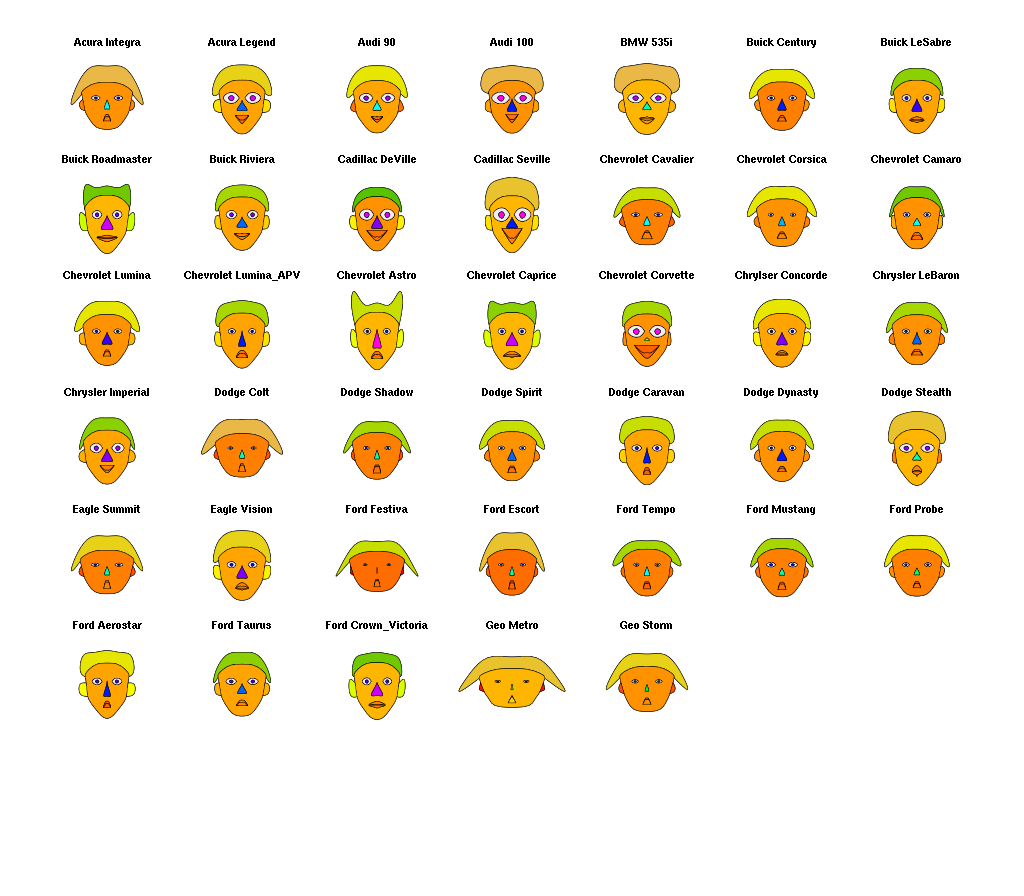

In [56]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=1024, height=896, res=50) as img:
    r_aplpack.faces(r_cars93,print_info=False)
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

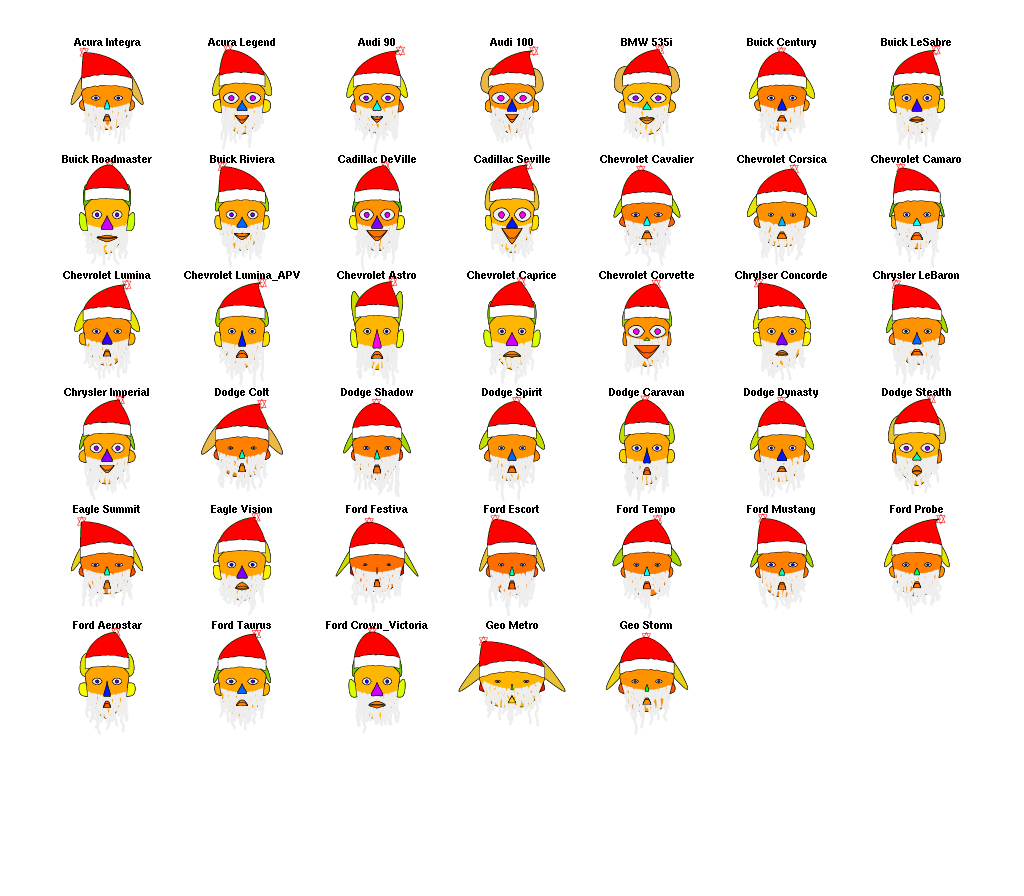

In [57]:
with render_to_bytesio(rpy2.robjects.lib.grdevices.png, width=1024, height=896, res=50) as img:
    r_aplpack.faces(r_cars93,face_type=2,print_info=False)
_ = IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))